# Understanding the Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan and after that, the company validates the customer eligibility for the loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.

As mentioned above this is a Binary Classification problem in which we need to predict our Target label which is “Loan Status”.

Loan status can have two values: Yes or NO.

Yes: if the loan is approved

NO: if the loan is not approved

So using the training dataset we will train our model and try to predict our target column that is “Loan Status” on the test dataset.

# About the dataset

So train and test dataset would have the same columns except for the target column that is “Loan Status”.

Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self-employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount : Loan amount in thousands

Loan_Amount_Term : Term of a loan in months

Credit_History : credit history

Property_Area : Urban/ Semi-Urban/ Rural

Loan_Status : (Target) Loan approved (Y/N)

# Load Essential Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings                          # Hiding Warnings
warnings.filterwarnings('ignore')

# Load train & test data

In [3]:
train = pd.read_csv("E://priya//EXL-DATA ANALYYICS//Datasets//loan_eligible_train.csv")
test = pd.read_csv("E://priya//EXL-DATA ANALYYICS//Datasets//loan_eligible_test.csv")

#### Let’s make a copy of the train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [4]:
train_original=train.copy()
test_original=test.copy()

# Data Understanding

In [5]:
#Top 5 records of train data
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Last 5 records of train data
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
#Random 5 records of train data
train.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
65,LP001225,Male,Yes,0,Graduate,No,5726,4595.0,258.0,360.0,1.0,Semiurban,N
494,LP002585,Male,Yes,0,Graduate,No,3597,2157.0,119.0,360.0,0.0,Rural,N
324,LP002065,Male,Yes,3+,Graduate,No,15000,0.0,300.0,360.0,1.0,Rural,Y
129,LP001465,Male,Yes,0,Graduate,No,6080,2569.0,182.0,360.0,NaN,Rural,N
299,LP001963,Male,Yes,1,Graduate,No,2014,2925.0,113.0,360.0,1.0,Urban,N


In [8]:
#Random 5 records of test data
test.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
25,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.0,Rural
19,LP001115,Male,No,0,Graduate,No,1300,3470,100.0,180.0,1.0,Semiurban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
220,LP002212,Male,Yes,0,Graduate,No,2166,2166,108.0,360.0,NaN,Urban
81,LP001428,Male,Yes,3+,Graduate,No,72529,0,360.0,360.0,1.0,Urban


## Size & shape of train and test data

In [9]:
#Shape of train data
train.shape

(614, 13)

#### So we have 614 rows and 13 columns in our training dataset.

In [10]:
#Shape of test data
test.shape

(367, 12)

#### In test data, we have 367 rows and 12 columns because the target column is not included in the test data.

In [11]:
#Size of train data
train.size

7982

In [12]:
#Size of test data
test.size

4404

In [13]:
#Info of data (i.e.datatype & non-null value count of all columns)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
#Descriptive statistic of numeric columns
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Max of ApplicantIncome is higher(double of coapplicantIncome) than the max of CoapplicantIncome.

#### Min of CoapplicantIncome is 0 it means that some of the coapplicant are unemployed i.e they are not earning.

In [15]:
#Descriptive statistic of columns having dtype object
train.describe(include="object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


### Different types of variables are Categorical, ordinal, and numerical :

1.Categorical Features : These features have categories - Gender(Male/Female), Married(Yes/No), Self_Employed(Yes/No),                                    Credit_History(0/1), Education (Graduate/Not Graduate), Loan_Status(Y/N)(i. e. Target variable)
    
2.Ordinal Features : Variables in categorical features having some order involved - Dependents(Possible values:0,1,2,3+),                            Property_Area(Rural/Semi-Urban/Urban) 
    
3.Numerical Features : Loan ID, Applicant Income, Co-applicant Income, Loan Amount, and Loan amount term    

In [16]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Data Preprocessing

### Concatenating the train and test data for data preprocessing :

In [18]:
data = pd.concat([train,test])

### Dropping unwanted column

In [19]:
data.drop(columns="Loan_ID",axis=1,inplace=True)

### Identify missing values :

In [20]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [21]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
data.isnull().any()

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status           True
dtype: bool

In [23]:
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

### Imputing the missing values:

In [24]:
#Fill missing values of categorical features with mode
for i in [data]:
    i["Gender"] = i["Gender"].fillna(i["Gender"].mode()[0])
    i["Married"] = i["Married"].fillna(i["Married"].mode()[0])
    i["Dependents"] = i["Dependents"].fillna(i["Dependents"].mode()[0])
    i["Self_Employed"] = i["Self_Employed"].fillna(i["Self_Employed"].mode()[0])
    i["Credit_History"] = i["Credit_History"].fillna(i["Credit_History"].mode()[0])

In [25]:
#Fill missing values of numeric features with median
i["LoanAmount"] = i["LoanAmount"].fillna(i["LoanAmount"].median())
i["Loan_Amount_Term"] = i["Loan_Amount_Term"].fillna(i["Loan_Amount_Term"].median())

In [26]:
data.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

#### So now as we have imputed all the missing values we go on to mapping the categorical variables with the integers.

In [27]:
for i in [data]:
    i["Gender"] = i["Gender"].map({"Male":0,"Female":1}).astype(int)
    i["Married"] = i["Married"].map({"No":0,"Yes":1}).astype(int)
    i["Education"] = i["Education"].map({"Not Graduate":0,"Graduate":1}).astype(int)
    i["Self_Employed"] = i["Self_Employed"].map({"No":0,"Yes":1}).astype(int)
    i["Credit_History"] = i["Credit_History"].astype(int)

In [28]:
for i in [data]:
    i["Property_Area"] = i["Property_Area"].map({"Urban":0,"Rural":1,"Semiurban":3}).astype(int)
    i["Dependents"] = i["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int32  
 1   Married            981 non-null    int32  
 2   Dependents         981 non-null    int64  
 3   Education          981 non-null    int32  
 4   Self_Employed      981 non-null    int32  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    int32  
 10  Property_Area      981 non-null    int32  
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int32(6), int64(2), object(1)
memory usage: 76.6+ KB


#### We map the values so that we can input the train data into the model as the model does not accept any string values.

# Exploratory Data Analysis (EDA)

### Splitting the data to new_train and new_test so that we can perform EDA.

In [30]:
new_train = data.iloc[:614]

In [31]:
new_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,126.0,360.0,1,0,Y
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1,1,N
2,0,1,0,1,1,3000,0.0,66.0,360.0,1,0,Y
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1,0,Y
4,0,0,0,1,0,6000,0.0,141.0,360.0,1,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1,1,Y
610,0,1,3,1,0,4106,0.0,40.0,180.0,1,1,Y
611,0,1,1,1,0,8072,240.0,253.0,360.0,1,0,Y
612,0,1,2,1,0,7583,0.0,187.0,360.0,1,0,Y


In [32]:
new_test = data.iloc[614:]

In [33]:
new_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,1,0,5720,0.0,110.0,360.0,1,0,NaN
1,0,1,1,1,0,3076,1500.0,126.0,360.0,1,0,NaN
2,0,1,2,1,0,5000,1800.0,208.0,360.0,1,0,NaN
3,0,1,2,1,0,2340,2546.0,100.0,360.0,1,0,NaN
4,0,0,0,0,0,3276,0.0,78.0,360.0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,3,0,1,4009,1777.0,113.0,360.0,1,0,NaN
363,0,1,0,1,0,4158,709.0,115.0,360.0,1,0,NaN
364,0,0,0,1,0,3250,1993.0,126.0,360.0,1,3,NaN
365,0,1,0,1,0,5000,2393.0,158.0,360.0,1,1,NaN


## Mapping ‘N’ to 0 and ‘Y’ to 1 of new_train data

In [34]:
new_train["Loan_Status"] = new_train["Loan_Status"].map({"N":0,"Y":1}).astype(int)

In [35]:
new_train["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

#### Normalize can be set to True to print proportions instead of number

In [36]:
new_train["Loan_Status"].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

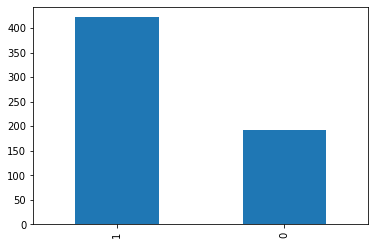

In [37]:
new_train["Loan_Status"].value_counts().plot.bar()

#### The loan of 422(around 69%) people out of 614 were approved.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

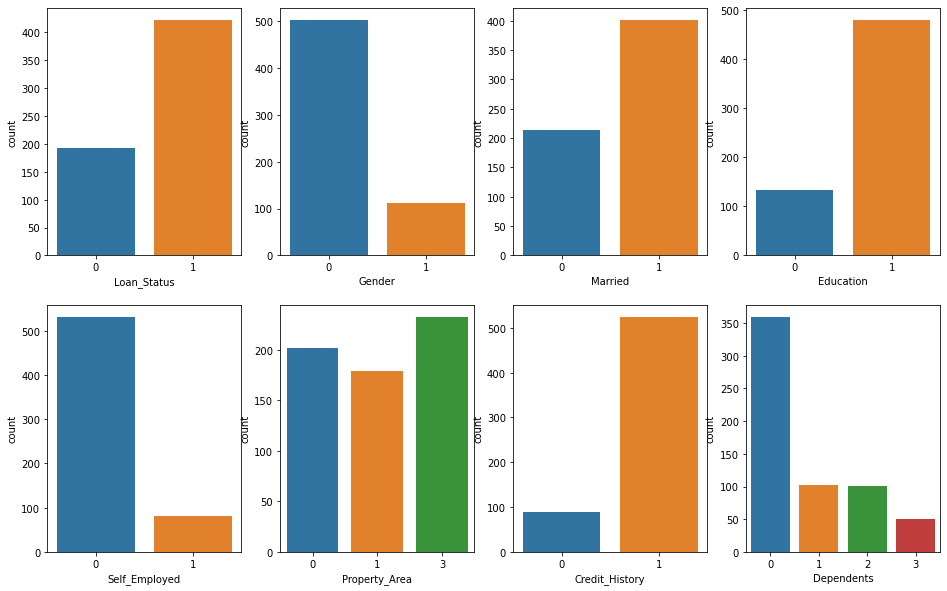

In [38]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot("Loan_Status",data=new_train,ax=ax[0][0])
sns.countplot("Gender",data=new_train,ax=ax[0][1])
sns.countplot("Married",data=new_train,ax=ax[0][2])
sns.countplot("Education",data=new_train,ax=ax[0][3])
sns.countplot("Self_Employed",data=new_train,ax=ax[1][0])
sns.countplot("Property_Area",data=new_train,ax=ax[1][1])
sns.countplot("Credit_History",data=new_train,ax=ax[1][2])
sns.countplot("Dependents",data=new_train,ax=ax[1][3])

1.More Loans are approved Vs Rejected

2.Count of Male applicants is more than Female

3.Count of Married applicant is more than Non-married

4.Count of graduate is more than non-Graduate

5.Count of self-employed is less than that of Non-Self-employed

6.Maximum properties are located in Semiurban areas

7.Credit History is present for many applicants

8.The count of applicants with several dependents=0 is maximum.

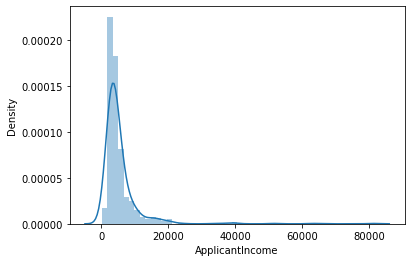

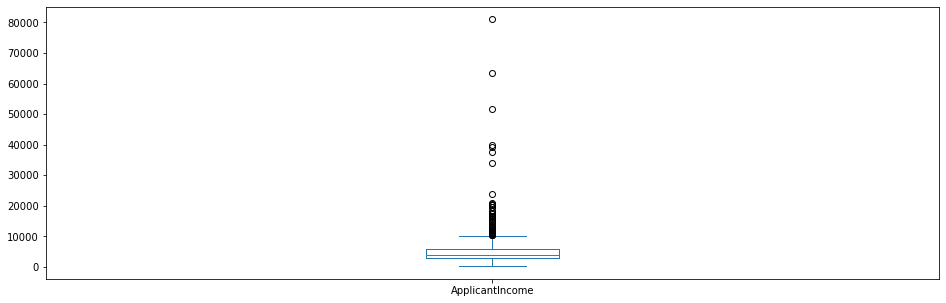

In [39]:
sns.distplot(new_train["ApplicantIncome"])
plt.show()
new_train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values.

#### Income depends upon the education. So Let us segregate Applicants income by Education.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

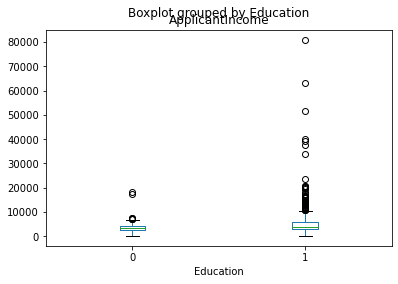

In [40]:
new_train.boxplot(column="ApplicantIncome", by = "Education",grid=False) 

#### We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

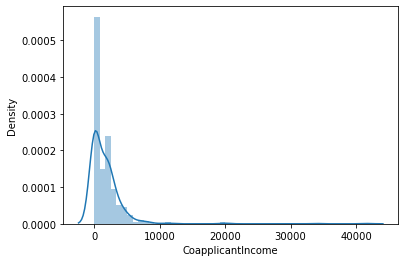

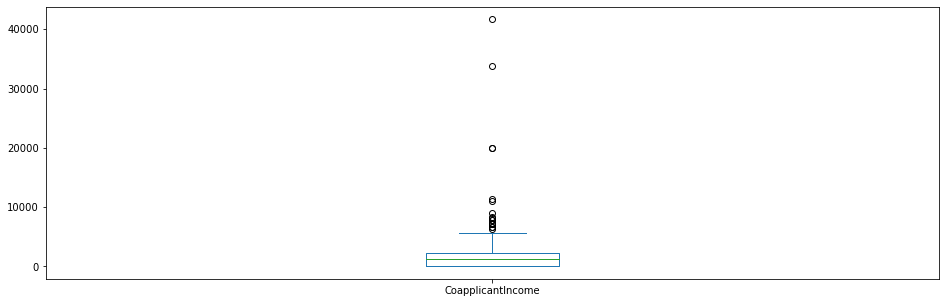

In [41]:
#Let’s look at the Co-applicant income distribution.
sns.distplot(new_train["CoapplicantIncome"])
plt.show()
new_train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

#### We see a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

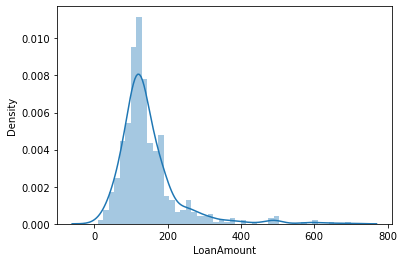

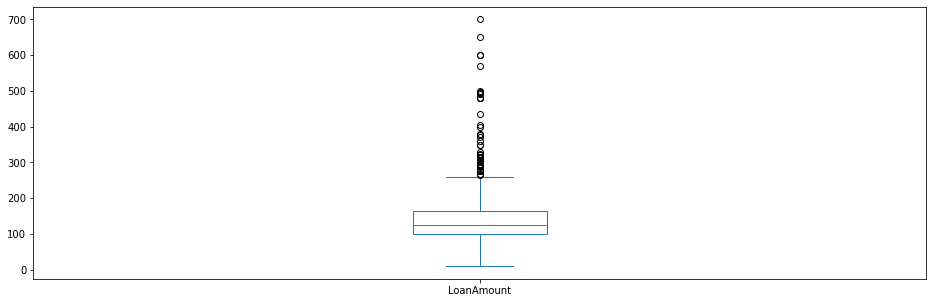

In [42]:
#Let’s look at the LoanAmount distribution.
sns.distplot(new_train["LoanAmount"])
plt.show()
new_train["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

#### We see a lot of outliers in this variable and the distribution is fairly normal.And we see a lot of outliers .

## First of all, we will find the relation between the target variable and categorical independent variables.

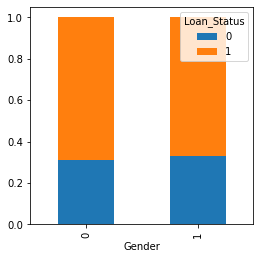

In [43]:
Gender=pd.crosstab(new_train["Gender"],new_train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

#### It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

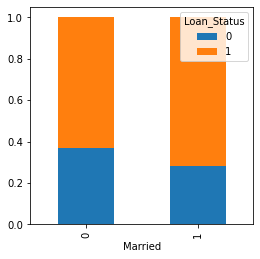

In [44]:
Married=pd.crosstab(new_train["Married"],new_train["Loan_Status"])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

#### The proportion of married applicants is higher for approved loans.

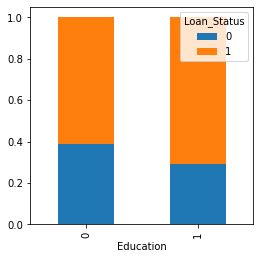

In [45]:
Education=pd.crosstab(new_train["Education"],new_train["Loan_Status"])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

#### The proportion of graduate applicants is higher for approved loans.

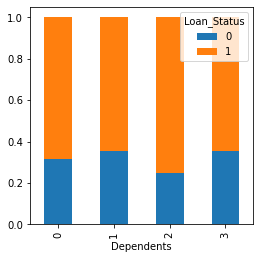

In [46]:
Dependents=pd.crosstab(new_train["Dependents"],new_train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

#### Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.And proportion of applicants with 2dependents is higher for loan approved.

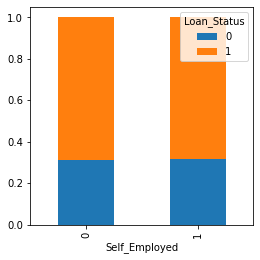

In [47]:
Self_Employed=pd.crosstab(new_train["Self_Employed"],new_train["Loan_Status"])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

#### There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

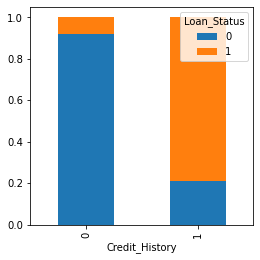

In [48]:
Credit_History=pd.crosstab(new_train["Credit_History"],new_train["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

#### It seems people with a credit history as 1 are more likely to get their loans approved.

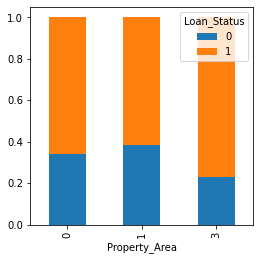

In [49]:
Property_Area=pd.crosstab(new_train["Property_Area"],new_train["Loan_Status"])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

#### The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

## Now let’s visualize numerical independent variables with respect to the target variable.

<AxesSubplot:xlabel='Loan_Status'>

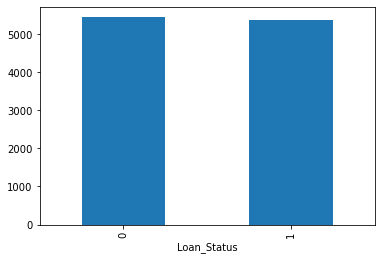

In [50]:
new_train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

#### Here the y-axis represents the mean applicant income. We don’t see any change in the mean income.

### So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

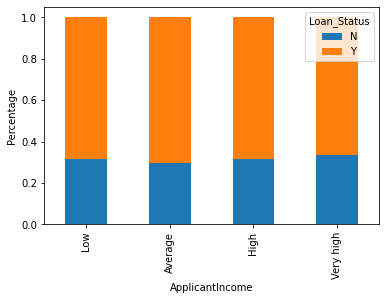

In [51]:
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very high"]
new_train["Income_bin"]=pd.cut(new_train["ApplicantIncome"],bins,labels=group)
Income_bin=pd.crosstab(new_train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("ApplicantIncome")
P=plt.ylabel("Percentage")

#### It can be inferred that Applicant's income does not affect the chances of loan approval

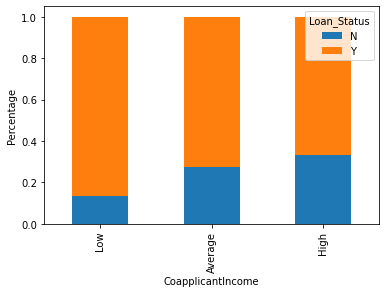

In [52]:
#We will analyze the co-applicant income and loan amount variable in a similar manner.
bins=[0,1000,3000,42000]
group=["Low","Average","High"]
new_train["Coapplicant_Income_bin"]=pd.cut(new_train["CoapplicantIncome"],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(new_train["Coapplicant_Income_bin"],train["Loan_Status"])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("CoapplicantIncome")
P=plt.ylabel("Percentage")

#### It shows that if co-applicants income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any co-applicant so the co-applicant income for such applicants is 0 and hence the loan approval is not dependent on it.

### So, we can make a new variable in which we will combine the applicant’s and co-applicants income to visualize the combined effect of income on loan approval.

In [53]:
new_train["TotalIncome"] = new_train["ApplicantIncome"] + new_train["CoapplicantIncome"]

In [54]:
#Also add TotalIncome in new_test data for further analysis
new_test["TotalIncome"] = new_test["ApplicantIncome"] + new_test["CoapplicantIncome"]

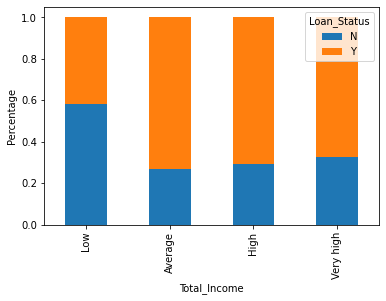

In [55]:
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very high"]
new_train["TotalIncome_bin"]=pd.cut(new_train["TotalIncome"],bins,labels=group)
TotalIncome_bin=pd.crosstab(new_train["TotalIncome_bin"],train["Loan_Status"])
TotalIncome_bin.div(TotalIncome_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("Total_Income")
P=plt.ylabel("Percentage")

#### We can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.

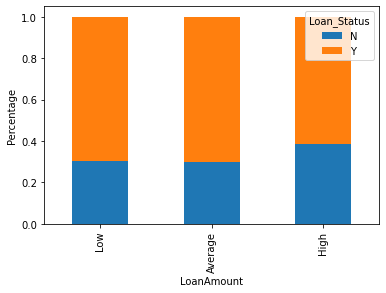

In [56]:
#Let’s visualize the Loan Amount variable.
bins=[0,100,200,700]
group=["Low","Average","High"]
new_train["LoanAmount_bin"]=pd.cut(new_train["LoanAmount"],bins,labels=group)
LoanAmount_bin=pd.crosstab(new_train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel("LoanAmount")
P=plt.ylabel("Percentage")

#### It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which means loan approval chances will be high when loan amount is less.

### Let’s drop the bins which we created for the exploration part.

In [57]:
new_train=new_train.drop(["Income_bin", "Coapplicant_Income_bin", "LoanAmount_bin", "TotalIncome_bin"], axis=1)

In [58]:
new_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,0,0,1,0,5849,0.0,126.0,360.0,1,0,1,5849.0
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1,1,0,6091.0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1,0,1,3000.0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1,0,1,4941.0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1,0,1,6000.0


In [59]:
new_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,1,0,1,0,5720,0.0,110.0,360.0,1,0,NaN,5720.0
1,0,1,1,1,0,3076,1500.0,126.0,360.0,1,0,NaN,4576.0
2,0,1,2,1,0,5000,1800.0,208.0,360.0,1,0,NaN,6800.0
3,0,1,2,1,0,2340,2546.0,100.0,360.0,1,0,NaN,4886.0
4,0,0,0,0,0,3276,0.0,78.0,360.0,1,0,NaN,3276.0


### Drop unwanted columns from new_train and new_test data

In [60]:
new_train = new_train.drop(columns=["ApplicantIncome","CoapplicantIncome"],axis=1)

In [61]:
new_train

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,0,0,1,0,126.0,360.0,1,0,1,5849.0
1,0,1,1,1,0,128.0,360.0,1,1,0,6091.0
2,0,1,0,1,1,66.0,360.0,1,0,1,3000.0
3,0,1,0,0,0,120.0,360.0,1,0,1,4941.0
4,0,0,0,1,0,141.0,360.0,1,0,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,71.0,360.0,1,1,1,2900.0
610,0,1,3,1,0,40.0,180.0,1,1,1,4106.0
611,0,1,1,1,0,253.0,360.0,1,0,1,8312.0
612,0,1,2,1,0,187.0,360.0,1,0,1,7583.0


In [62]:
new_test = new_test.drop(columns=["ApplicantIncome","CoapplicantIncome"],axis=1)

In [63]:
new_test

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,1,0,1,0,110.0,360.0,1,0,NaN,5720.0
1,0,1,1,1,0,126.0,360.0,1,0,NaN,4576.0
2,0,1,2,1,0,208.0,360.0,1,0,NaN,6800.0
3,0,1,2,1,0,100.0,360.0,1,0,NaN,4886.0
4,0,0,0,0,0,78.0,360.0,1,0,NaN,3276.0
...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,3,0,1,113.0,360.0,1,0,NaN,5786.0
363,0,1,0,1,0,115.0,360.0,1,0,NaN,4867.0
364,0,0,0,1,0,126.0,360.0,1,3,NaN,5243.0
365,0,1,0,1,0,158.0,360.0,1,1,NaN,7393.0


In [64]:
new_train.corr()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
Gender,1.000000,-0.364569,-0.172914,0.045364,0.000525,-0.106782,0.074030,-0.009170,0.094356,-0.017987,-0.093191
Married,-0.364569,1.000000,0.334216,-0.012304,0.004489,0.146466,-0.100912,0.010938,0.004202,0.091478,0.083319
Dependents,-0.172914,0.334216,1.000000,-0.055752,0.056798,0.163086,-0.103864,-0.040160,0.001885,0.010118,0.125590
Education,0.045364,-0.012304,-0.055752,1.000000,0.010383,0.168933,0.073928,0.073658,0.017175,0.085884,0.161362
Self_Employed,0.000525,0.004489,0.056798,0.010383,1.000000,0.115071,-0.033739,-0.001550,0.017613,-0.003700,0.113000
LoanAmount,-0.106782,0.146466,0.163086,0.168933,0.115071,1.000000,0.037009,-0.000518,0.009082,-0.032864,0.620277
Loan_Amount_Term,0.074030,-0.100912,-0.103864,0.073928,-0.033739,0.037009,1.000000,-0.004705,0.078881,-0.022549,-0.070917
Credit_History,-0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.000518,-0.004705,1.000000,0.033254,0.540556,-0.012563
Property_Area,0.094356,0.004202,0.001885,0.017175,0.017613,0.009082,0.078881,0.033254,1.000000,0.118686,-0.022922
Loan_Status,-0.017987,0.091478,0.010118,0.085884,-0.003700,-0.032864,-0.022549,0.540556,0.118686,1.000000,-0.031271


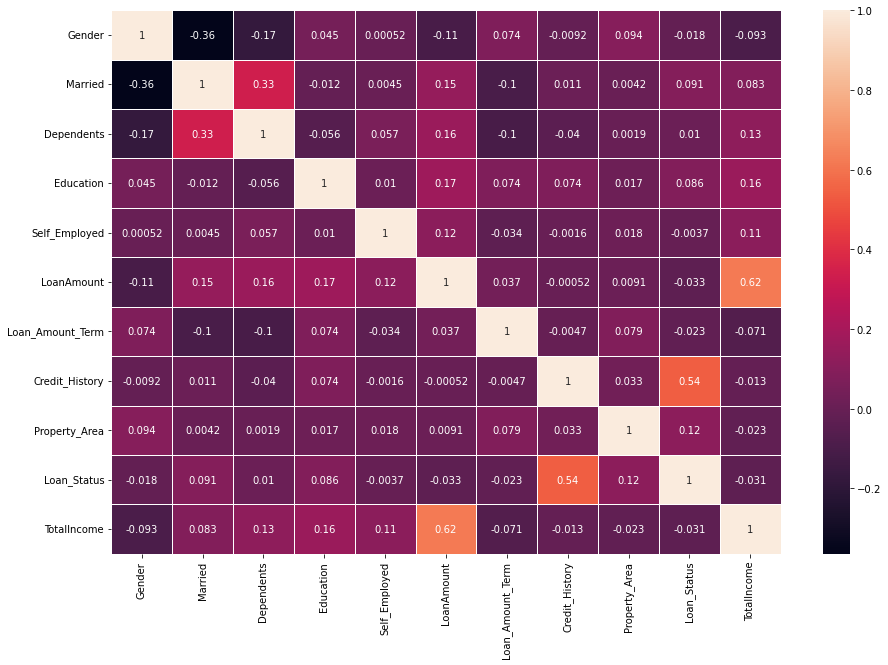

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(new_train.corr(),annot=True,linewidths=1)
plt.show()

#### We see that the most correlate variables are (TotalIncome — LoanAmount) and (Credit_History — Loan_Status)

# Splitting data into dependent and independent features

In [66]:
x=new_train.drop(columns="Loan_Status")
y=new_train["Loan_Status"]

In [67]:
x.head(n=2)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,0,0,0,1,0,126.0,360.0,1,0,5849.0
1,0,1,1,1,0,128.0,360.0,1,1,6091.0


In [68]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int32  
 1   Married           614 non-null    int32  
 2   Dependents        614 non-null    int64  
 3   Education         614 non-null    int32  
 4   Self_Employed     614 non-null    int32  
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    int32  
 8   Property_Area     614 non-null    int32  
 9   TotalIncome       614 non-null    float64
dtypes: float64(3), int32(6), int64(1)
memory usage: 54.5 KB


In [69]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [70]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

### As from the above count of 0 and 1 the data is not balanced, so we have to balanced it.

# Balancing dataset

In [71]:
from imblearn.over_sampling import SMOTE #Synthetic Minority Oversampling Technique (SMOTE) 
                               #is a statistical technique for increasing the number of cases in your dataset in a balanced way.
sm =  SMOTE(random_state=12)
x_res, y_res =  sm.fit_resample(x,y)

In [72]:
x_res.shape

(844, 10)

In [73]:
y_res.shape

(844,)

In [74]:
from collections import Counter

In [75]:
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_res))

original dataset shape: Counter({1: 422, 0: 192})
Resample dataset shape Counter({1: 422, 0: 422})


# Splitting Data into Training and Testing Data

In [76]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.3, random_state=45)

In [77]:
x_train.shape,x_test.shape

((590, 10), (254, 10))

In [78]:
y_train.shape,y_test.shape

((590,), (254,))

# Feature Scaling

#### As in the data the variables are of different unit so we have to scale all the variables in the same unit.

In [79]:
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [80]:
x_train

array([[-0.41588728,  0.91855865,  1.34102847, ..., -1.57832958,
        -0.2011236 , -0.50136707],
       [ 2.4044977 , -1.08866211,  0.31879747, ...,  0.63358123,
        -1.02517166, -0.51711658],
       [ 2.4044977 ,  0.91855865,  0.31879747, ...,  0.63358123,
        -1.02517166, -0.34362838],
       ...,
       [ 2.4044977 ,  0.91855865, -0.70343354, ...,  0.63358123,
         1.44697254, -0.48040701],
       [-0.41588728,  0.91855865,  0.31879747, ..., -1.57832958,
        -0.2011236 , -0.25309134],
       [ 2.4044977 ,  0.91855865, -0.70343354, ..., -1.57832958,
         1.44697254, -0.24374946]])

# Model Building

# 1.Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix,recall_score,precision_score,ConfusionMatrixDisplay

In [82]:
maxi_iter = [ ]
for i in range(0,110,10):
    model_l = LogisticRegression(max_iter=i)
    model_l.fit(x_train,y_train)
    pred_l = model_l.predict(x_test)
    accuracy_score(y_test,pred_l)
    maxi_iter.append(accuracy_score(y_test,pred_l))
    print("max_iter : ",i)
    print("accuracy score : ",(accuracy_score(y_test,pred_l)))
    print("\n")
print("Max_iter : ",(maxi_iter.index(max(maxi_iter)))*10)
print("Accuracy_score : ",max(maxi_iter))

max_iter :  0
accuracy score :  0.8070866141732284


max_iter :  10
accuracy score :  0.8110236220472441


max_iter :  20
accuracy score :  0.8110236220472441


max_iter :  30
accuracy score :  0.8110236220472441


max_iter :  40
accuracy score :  0.8110236220472441


max_iter :  50
accuracy score :  0.8110236220472441


max_iter :  60
accuracy score :  0.8110236220472441


max_iter :  70
accuracy score :  0.8110236220472441


max_iter :  80
accuracy score :  0.8110236220472441


max_iter :  90
accuracy score :  0.8110236220472441


max_iter :  100
accuracy score :  0.8110236220472441


Max_iter :  10
Accuracy_score :  0.8110236220472441


In [83]:
precision_score(y_test,pred_l)

0.7735849056603774

In [84]:
recall_score(y_test,pred_l)

0.9111111111111111

In [85]:
confusion_matrix(y_test,pred_l)

array([[ 83,  36],
       [ 12, 123]], dtype=int64)

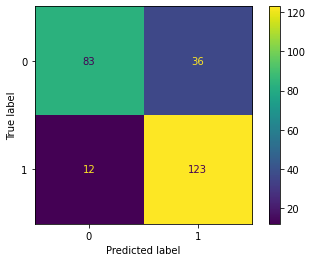

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test,pred_l)

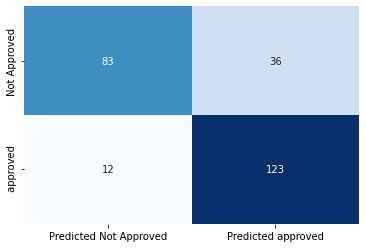

In [87]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_l)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', cbar=False, yticklabels=['Not Approved', ' approved'],
            xticklabels=['Predicted Not Approved', 'Predicted approved'])
plt.show()

# 2.Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
model_dt = DecisionTreeClassifier(max_depth=3)

In [90]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [91]:
pred_dt = model_dt.predict(x_test)

In [92]:
pred_dt

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [93]:
accuracy_score(y_test,pred_dt)

0.7834645669291339

In [94]:
precision_score(y_test,pred_dt)

0.7777777777777778

In [95]:
recall_score(y_test,pred_dt)

0.8296296296296296

In [96]:
confusion_matrix(y_test,pred_dt)

array([[ 87,  32],
       [ 23, 112]], dtype=int64)

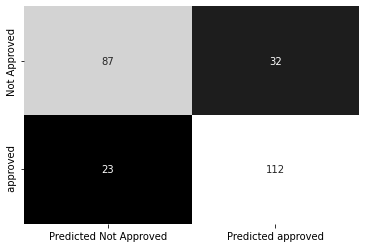

In [97]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_dt)
sns.heatmap(cm, cmap='Greys_r', annot=True, fmt='d', cbar=False, yticklabels=['Not Approved', ' approved'],
            xticklabels=['Predicted Not Approved', 'Predicted approved'])
plt.show()

In [98]:
from sklearn.tree import plot_tree

In [99]:
new_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'TotalIncome'],
      dtype='object')

In [100]:
new_train["Loan_Status"].unique()

array([1, 0])

In [101]:
feature_name = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','Income']
cn = ["1","0"]

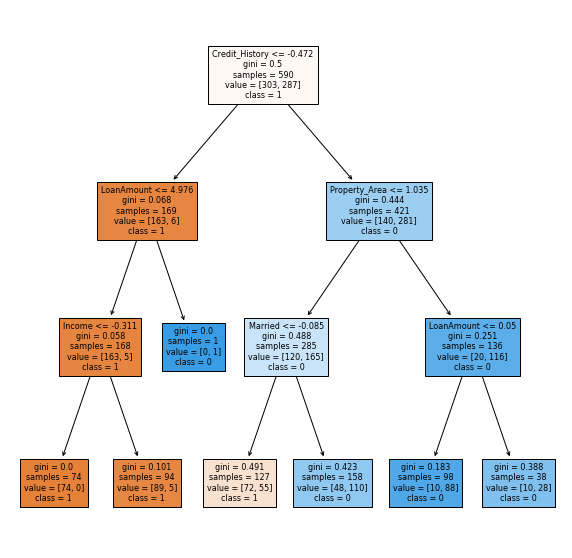

In [102]:
plt.figure(figsize=(10,10))
a = plot_tree(model_dt,fontsize=8,feature_names=feature_name,class_names=cn,filled=True)
plt.show()

# 3.KNN Algorithm

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,y_train)
pred_knn = model_knn.predict(x_test)

In [105]:
pred_knn

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [106]:
accuracy_score(y_test,pred_knn)

0.8031496062992126

In [107]:
n_neighbor = []
for i in range(5,75,2):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_knn = model_knn.predict(x_test)
    accuracy_score(pred_knn,y_test)
    n_neighbor.append(accuracy_score(pred_knn,y_test))
    print("n_neighbors : ",i)
    print("accuracy score : ",(accuracy_score(pred_knn,y_test)))
    print("\n")
print("Accuracy : ",max(n_neighbor))

n_neighbors :  5
accuracy score :  0.8031496062992126


n_neighbors :  7
accuracy score :  0.8149606299212598


n_neighbors :  9
accuracy score :  0.8031496062992126


n_neighbors :  11
accuracy score :  0.8031496062992126


n_neighbors :  13
accuracy score :  0.8070866141732284


n_neighbors :  15
accuracy score :  0.7992125984251969


n_neighbors :  17
accuracy score :  0.7913385826771654


n_neighbors :  19
accuracy score :  0.7992125984251969


n_neighbors :  21
accuracy score :  0.7874015748031497


n_neighbors :  23
accuracy score :  0.8070866141732284


n_neighbors :  25
accuracy score :  0.8070866141732284


n_neighbors :  27
accuracy score :  0.8149606299212598


n_neighbors :  29
accuracy score :  0.8070866141732284


n_neighbors :  31
accuracy score :  0.8070866141732284


n_neighbors :  33
accuracy score :  0.8110236220472441


n_neighbors :  35
accuracy score :  0.7992125984251969


n_neighbors :  37
accuracy score :  0.7992125984251969


n_neighbors :  39
accuracy score :

In [ ]:
n_neighbors :  47
accuracy score :  0.8307086614173228

In [108]:
precision_score(y_test,pred_knn)

0.7602339181286549

In [109]:
recall_score(y_test,pred_knn)

0.9629629629629629

In [110]:
confusion_matrix(y_test,pred_knn)

array([[ 78,  41],
       [  5, 130]], dtype=int64)

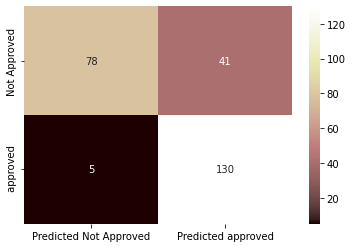

In [111]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_knn)
sns.heatmap(cm, cmap='pink', annot=True, fmt='d', yticklabels=['Not Approved', ' approved'],
            xticklabels=['Predicted Not Approved', 'Predicted approved'])
plt.show()

In [112]:
scores = []
for k in range(5,75,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred_knn = knn.predict(x_test)
    accuracy_score(pred_knn,y_test)
    scores.append(accuracy_score(pred_knn,y_test))

print(scores)

[0.8031496062992126, 0.8149606299212598, 0.8031496062992126, 0.8031496062992126, 0.8070866141732284, 0.7992125984251969, 0.7913385826771654, 0.7992125984251969, 0.7874015748031497, 0.8070866141732284, 0.8070866141732284, 0.8149606299212598, 0.8070866141732284, 0.8070866141732284, 0.8110236220472441, 0.7992125984251969, 0.7992125984251969, 0.8031496062992126, 0.8149606299212598, 0.8188976377952756, 0.8188976377952756, 0.8307086614173228, 0.8267716535433071, 0.8228346456692913, 0.8267716535433071, 0.8267716535433071, 0.8307086614173228, 0.8188976377952756, 0.8188976377952756, 0.8188976377952756, 0.8228346456692913, 0.8110236220472441, 0.8110236220472441, 0.8110236220472441, 0.8188976377952756]


Text(0, 0.5, 'Testing Accuracy')

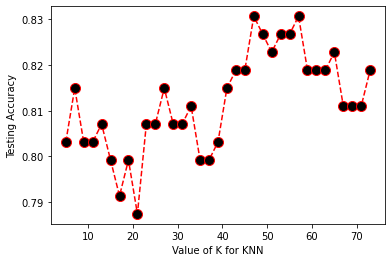

In [113]:
plt.plot(range(5,75,2), scores,color ="red",linestyle = "dashed",marker ="o",markerfacecolor ="black",markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# 4.Naive Bayes Classifier

In [114]:
from sklearn.naive_bayes import GaussianNB

In [115]:
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
pred_nb = model_nb.predict(x_test)

In [116]:
pred_nb

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

In [117]:
accuracy_score(y_test,pred_nb)

0.8188976377952756

In [118]:
precision_score(y_test,pred_nb)

0.751412429378531

In [119]:
recall_score(y_test,pred_nb)

0.9851851851851852

In [120]:
confusion_matrix(y_test,pred_nb)

array([[ 75,  44],
       [  2, 133]], dtype=int64)

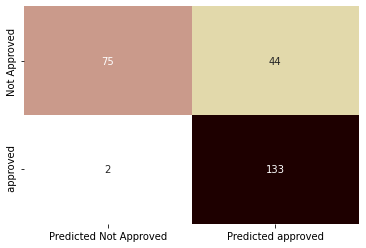

In [121]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_nb)
sns.heatmap(cm, cmap='pink_r', annot=True, fmt='d', cbar=False, yticklabels=['Not Approved', ' approved'],
            xticklabels=['Predicted Not Approved', 'Predicted approved'])
plt.show()

# 5.Support Vector Machine

In [122]:
from sklearn.svm import SVC

In [123]:
model_svc = SVC()
model_svc.fit(x_train,y_train)
pred_svc = model_svc.predict(x_test)

In [124]:
pred_svc

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [125]:
accuracy_score(y_test,pred_svc)

0.8307086614173228

In [126]:
precision_score(y_test,pred_svc)

0.7705882352941177

In [127]:
recall_score(y_test,pred_svc)

0.9703703703703703

In [128]:
confusion_matrix(y_test,pred_svc)

array([[ 80,  39],
       [  4, 131]], dtype=int64)

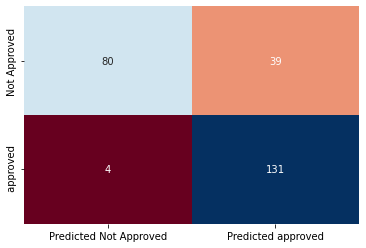

In [129]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cm, cmap='RdBu', annot=True, fmt='d', cbar=False, yticklabels=['Not Approved', ' approved'],
            xticklabels=['Predicted Not Approved', 'Predicted approved'])
plt.show()

# 6.Random Forest Classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
pred_rf = model_rf.predict(x_test)

In [132]:
pred_rf

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [133]:
accuracy_score(y_test,pred_rf)

0.8740157480314961

In [134]:
precision_score(y_test,pred_rf)

0.8456375838926175

In [135]:
recall_score(y_test,pred_rf)

0.9333333333333333

In [136]:
confusion_matrix(y_test,pred_rf)

array([[ 96,  23],
       [  9, 126]], dtype=int64)

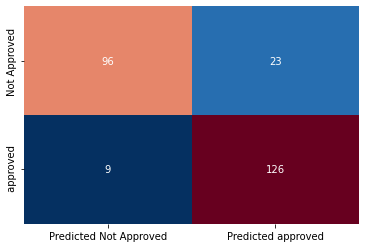

In [137]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_rf)
sns.heatmap(cm, cmap='RdBu_r', annot=True, fmt='d', cbar=False,yticklabels=['Not Approved', ' approved'],
            xticklabels=['Predicted Not Approved', 'Predicted approved'])
plt.show()

# 7.Gradient Boosting

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

In [139]:
model_gbc = GradientBoostingClassifier()
model_gbc.fit(x_train,y_train)
pred_gbc = model_gbc.predict(x_test)

In [140]:
pred_gbc

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [141]:
accuracy_score(y_test,pred_gbc)

0.8385826771653543

In [142]:
precision_score(y_test,pred_gbc)

0.8133333333333334

In [143]:
recall_score(y_test,pred_gbc)

0.9037037037037037

In [144]:
confusion_matrix(y_test,pred_gbc)

array([[ 91,  28],
       [ 13, 122]], dtype=int64)

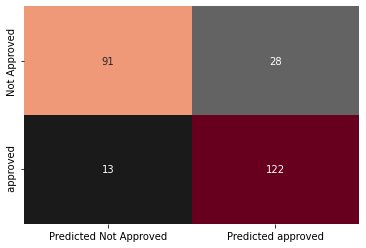

In [145]:
# Visualising Confusion Matrix
cm = confusion_matrix(y_test, pred_gbc)
sns.heatmap(cm, cmap='RdGy_r', annot=True, fmt='d', cbar=False, yticklabels=['Not Approved', ' approved'],
            xticklabels=['Predicted Not Approved', 'Predicted approved'])
plt.show()

# Conclusion : 

#### Among all algorithms random forest performs best with accuracy = 0.8937007874015748 also Precision score and recall score is high for random forest which are 0.86 and 0.9555555555555556 resp.So , for further predictions we use Random Forest Classifier.

# Predicting on new_test data

In [146]:
new_test

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,1,0,1,0,110.0,360.0,1,0,NaN,5720.0
1,0,1,1,1,0,126.0,360.0,1,0,NaN,4576.0
2,0,1,2,1,0,208.0,360.0,1,0,NaN,6800.0
3,0,1,2,1,0,100.0,360.0,1,0,NaN,4886.0
4,0,0,0,0,0,78.0,360.0,1,0,NaN,3276.0
...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,3,0,1,113.0,360.0,1,0,NaN,5786.0
363,0,1,0,1,0,115.0,360.0,1,0,NaN,4867.0
364,0,0,0,1,0,126.0,360.0,1,3,NaN,5243.0
365,0,1,0,1,0,158.0,360.0,1,1,NaN,7393.0


In [147]:
new_test = new_test.drop(columns="Loan_Status",axis=1)

In [148]:
pred_rf = model_rf.predict(new_test)

In [149]:
pred_rf

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [150]:
submission = pd.DataFrame()
submission["Loan_ID"] = test_original.Loan_ID
submission["Predicted Values"] = pred_rf

In [151]:
submission

,Loan_ID,Predicted Values
0,LP001015,0
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,0
364,LP002980,0
365,LP002986,0


# Prepare Submission file in CSV Form

In [152]:
submission.to_csv('E://priya//EXL-DATA ANALYYICS//Datasets//Loan_Approval_Prediction_submission.csv')

In [153]:
submission["Predicted Values"].value_counts()

0    232
1    135
Name: Predicted Values, dtype: int64